<a href="https://colab.research.google.com/github/Kidar12/GDGoC_ML_Assignment-2/blob/main/Dataset_SPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SPY.csv to SPY (2).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

df_spy = pd.read_csv('/content/SPY.csv')
df_spy.head(10)

,Unnamed: 0,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",-,0.0
1,1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1.0
2,2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0.0
3,3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0.0
4,4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223",...,1,NaN,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1.0
5,5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892",...,"4,654",86.0,"17,167,254",-,"138,529,362","50,982","9,438,601","4,517,131",inf,1.0
6,6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118",...,429,168.0,"48,197,850",inf,"65,447,476","57,372",inf,"9,990,302",NaN,0.0
7,7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094",...,30,87.0,"33,245,595",NaN,"3,372,428","5,762",inf,"6,063,523",inf,1.0
8,8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,...,NaN,NaN,NaN,inf,NaN,NaN,NaN,-inf,inf,1.0
9,9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,NaN,"90,676,573","10,400",...,117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",NaN,1.0


In [3]:
df_spy.tail(10)

,Unnamed: 0,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
6863,6863,Heartbreak Anniversary,HEARTBREAK ANNIVERSARY,Giveon,2/21/2020,USSM12000998,665,59.10333258845878,"1,157,206,056","189,404",...,255,57.99241520272594,"1,276,396",42.99328717346999,"77,600,589","71,185","29,746,145","6,963,195",-,-0.006888
6864,6864,QUE PRETENDES,OASIS,J Balvin,6/28/2019,USUM71912318,"2,849",26.203389612079064,"806,817,589","85,661",...,36,42.00790072255043,"919,695",32.997528423436215,NaN,NaN,"4,966,997","2,049,245",NaN,0.001622
6865,6865,telepatï¿½,Sin Miedo (del Amor y Otros Demonios) ï¿½,Kali Uchis,11/18/2020,GBUM72005748,435,73.889140669754,"1,151,629,030","201,783",...,"1,303",62.99062847942423,"488,896",60.007512768184284,"53,202,036","41,954","18,082,840","6,239,619",NaN,-0.007784
6866,6866,SNAP,SNAP,Rosa Linn,3/19/2022,USSM12207342,643,-,"1,039,482,815","99,333",...,661,74.99727455313987,"2,521,874",38.99359053809903,NaN,inf,"3,569,232","9,224,184",-inf,0.000044
6867,6867,Desire (with Sam Smith),Desire (with Sam Smith),Calvin Harris,7/28/2023,GBARL2300798,561,64.19318125843411,"226,519,256","43,558",...,35,97.998476003616,"1,777,050",30.997624082233017,"3,204,383",408,"4,424,240","2,178,835",-,-0.001638
6868,6868,Lean On (feat. Mï¿½ï¿½ & DJ Snake) - J Balvin ...,Lean On (feat. Mï¿½ï¿½ & DJ Snake) [J Balvin &...,Major Lazer,9/4/2015,FR6P11501180,"1,030",47.396160416820784,"53,822,187","2,081",...,-,1.005055116904699,234,NaN,NaN,-,NaN,NaN,NaN,-0.034493
6869,6869,Is It Over Now? (Taylor's Version) (From The V...,1989 (Taylor's Version),Taylor Swift,10/26/2023,USUG12306691,240,100.18066368348285,"406,821,432","20,404",...,20,26.997652078774916,"740,249",37.99079084751558,"18,715,607","6,762",NaN,"1,551,811",NaN,0.003324
6870,6870,You,You,Willy Paul,11/25/2022,QZW9K2296922,"4,546",19.50127396224503,"330,280",174,...,NaN,inf,-inf,inf,-,inf,-,"184,355",NaN,0.011949
6871,6871,To the Bone,Flying Solo,Pamungkas,6/14/2019,FR2X41995983,"4,221",20.468227375728517,"442,614,126","39,861",...,NaN,-inf,NaN,NaN,NaN,NaN,NaN,"403,782",NaN,-0.014058
6872,6872,i love you,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,3/29/2019,USUM71900773,"2,390",29.18645627610385,"930,343,185","116,055",...,1,35.99953841612304,"606,884",25.993409714943493,"38,736,042","167,546","3,706,611","2,035,027",NaN,0.011580


In [4]:
rm = ['Unnamed: 0', 'TIDAL Popularity']
df_spy.drop(rm, axis=1, inplace=True)

df_spy.head(10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0.0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1.0
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0.0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0.0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,"12,185",1,NaN,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1.0
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",...,"522,042","4,654",86.0,"17,167,254",-,"138,529,362","50,982","9,438,601","4,517,131",1.0
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",...,"383,478",429,168.0,"48,197,850",inf,"65,447,476","57,372",inf,"9,990,302",0.0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",...,"17,221",30,87.0,"33,245,595",NaN,"3,372,428","5,762",inf,"6,063,523",1.0
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,...,inf,NaN,NaN,NaN,inf,NaN,NaN,NaN,-inf,1.0
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,NaN,"90,676,573","10,400","184,199,419",...,"3,823",117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",1.0


In [5]:
df_spy['Spotify Streams'] = df_spy['Spotify Streams'].astype(str).str.replace(',', '')
df_spy['Spotify Streams'] = df_spy['Spotify Streams'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Spotify Streams'] = df_spy['Spotify Streams'].replace('', np.nan)
df_spy['Spotify Streams'] = df_spy['Spotify Streams'].astype(float)
df_spy['Spotify Streams'].fillna(0, inplace=True)

df_spy['Spotify Playlist Count'] = df_spy['Spotify Playlist Count'].astype(str).str.replace(',', '')
df_spy['Spotify Playlist Count'] = df_spy['Spotify Playlist Count'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Spotify Playlist Count'] = df_spy['Spotify Playlist Count'].replace('', np.nan)
df_spy['Spotify Playlist Count'] = df_spy['Spotify Playlist Count'].astype(float)
df_spy['Spotify Playlist Count'].fillna(0, inplace=True)

df_spy['Spotify Playlist Reach'] = df_spy['Spotify Playlist Reach'].astype(str).str.replace(',', '')
df_spy['Spotify Playlist Reach'] = df_spy['Spotify Playlist Reach'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Spotify Playlist Reach'] = df_spy['Spotify Playlist Reach'].replace('', np.nan)
df_spy['Spotify Playlist Reach'] = df_spy['Spotify Playlist Reach'].astype(float)
df_spy['Spotify Playlist Reach'].fillna(0, inplace=True)

df_spy['Spotify Popularity'] = df_spy['Spotify Popularity'].astype(str).str.replace(',', '')
df_spy['Spotify Popularity'] = df_spy['Spotify Popularity'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Spotify Popularity'] = df_spy['Spotify Popularity'].replace('', np.nan)
df_spy['Spotify Popularity'] = df_spy['Spotify Popularity'].astype(float)
df_spy['Spotify Popularity'].fillna(0, inplace=True)

df_spy['YouTube Views'] = df_spy['YouTube Views'].astype(str).str.replace(',', '')
df_spy['YouTube Views'] = df_spy['YouTube Views'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['YouTube Views'] = df_spy['YouTube Views'].replace('', np.nan)
df_spy['YouTube Views'] = df_spy['YouTube Views'].astype(float)
df_spy['YouTube Views'].fillna(0, inplace=True)

df_spy['YouTube Likes'] = df_spy['YouTube Likes'].astype(str).str.replace(',', '')
df_spy['YouTube Likes'] = df_spy['YouTube Likes'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['YouTube Likes'] = df_spy['YouTube Likes'].replace('', np.nan)
df_spy['YouTube Likes'] = df_spy['YouTube Likes'].astype(float)
df_spy['YouTube Likes'].fillna(0, inplace=True)

df_spy['YouTube Playlist Reach'] = df_spy['YouTube Playlist Reach'].astype(str).str.replace(',', '')
df_spy['YouTube Playlist Reach'] = df_spy['YouTube Playlist Reach'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['YouTube Playlist Reach'] = df_spy['YouTube Playlist Reach'].replace('', np.nan)
df_spy['YouTube Playlist Reach'] = df_spy['YouTube Playlist Reach'].astype(float)
df_spy['YouTube Playlist Reach'].fillna(0, inplace=True)

df_spy['TikTok Posts'] = df_spy['TikTok Posts'].astype(str).str.replace(',', '')
df_spy['TikTok Posts'] = df_spy['TikTok Posts'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['TikTok Posts'] = df_spy['TikTok Posts'].replace('', np.nan)
df_spy['TikTok Posts'] = df_spy['TikTok Posts'].astype(float)
df_spy['TikTok Posts'].fillna(0, inplace=True)

df_spy['TikTok Likes'] = df_spy['TikTok Likes'].astype(str).str.replace(',', '')
df_spy['TikTok Likes'] = df_spy['TikTok Likes'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['TikTok Likes'] = df_spy['TikTok Likes'].replace('', np.nan)
df_spy['TikTok Likes'] = df_spy['TikTok Likes'].astype(float)
df_spy['TikTok Likes'].fillna(0, inplace=True)

df_spy['TikTok Views'] = df_spy['TikTok Views'].astype(str).str.replace(',', '')
df_spy['TikTok Views'] = df_spy['TikTok Views'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['TikTok Views'] = df_spy['TikTok Views'].replace('', np.nan)
df_spy['TikTok Views'] = df_spy['TikTok Views'].astype(float)
df_spy['TikTok Views'].fillna(0, inplace=True)

df_spy['AirPlay Spins'] = df_spy['AirPlay Spins'].astype(str).str.replace(',', '')
df_spy['AirPlay Spins'] = df_spy['AirPlay Spins'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['AirPlay Spins'] = df_spy['AirPlay Spins'].replace('', np.nan)
df_spy['AirPlay Spins'] = df_spy['AirPlay Spins'].astype(float)
df_spy['AirPlay Spins'].fillna(0, inplace=True)

df_spy['SiriusXM Spins'] = df_spy['SiriusXM Spins'].astype(str).str.replace(',', '')
df_spy['SiriusXM Spins'] = df_spy['SiriusXM Spins'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['SiriusXM Spins'] = df_spy['SiriusXM Spins'].replace('', np.nan)
df_spy['SiriusXM Spins'] = df_spy['SiriusXM Spins'].astype(float)
df_spy['SiriusXM Spins'].fillna(0, inplace=True)

df_spy['Deezer Playlist Count'] = df_spy['Deezer Playlist Count'].astype(str).str.replace(',', '')
df_spy['Deezer Playlist Count'] = df_spy['Deezer Playlist Count'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Deezer Playlist Count'] = df_spy['Deezer Playlist Count'].replace('', np.nan)
df_spy['Deezer Playlist Count'] = df_spy['Deezer Playlist Count'].astype(float)
df_spy['Deezer Playlist Count'].fillna(0, inplace=True)

df_spy['Deezer Playlist Reach'] = df_spy['Deezer Playlist Reach'].astype(str).str.replace(',', '')
df_spy['Deezer Playlist Reach'] = df_spy['Deezer Playlist Reach'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Deezer Playlist Reach'] = df_spy['Deezer Playlist Reach'].replace('', np.nan)
df_spy['Deezer Playlist Reach'] = df_spy['Deezer Playlist Reach'].astype(float)
df_spy['Deezer Playlist Reach'].fillna(0, inplace=True)

df_spy['Amazon Playlist Count'] = df_spy['Amazon Playlist Count'].astype(str).str.replace(',', '')
df_spy['Amazon Playlist Count'] = df_spy['Amazon Playlist Count'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Amazon Playlist Count'] = df_spy['Amazon Playlist Count'].replace('', np.nan)
df_spy['Amazon Playlist Count'] = df_spy['Amazon Playlist Count'].astype(float)
df_spy['Amazon Playlist Count'].fillna(0, inplace=True)

df_spy['Pandora Streams'] = df_spy['Pandora Streams'].astype(str).str.replace(',', '')
df_spy['Pandora Streams'] = df_spy['Pandora Streams'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Pandora Streams'] = df_spy['Pandora Streams'].replace('', np.nan)
df_spy['Pandora Streams'] = df_spy['Pandora Streams'].astype(float)
df_spy['Pandora Streams'].fillna(0, inplace=True)

df_spy['Pandora Track Stations'] = df_spy['Pandora Track Stations'].astype(str).str.replace(',', '')
df_spy['Pandora Track Stations'] = df_spy['Pandora Track Stations'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Pandora Track Stations'] = df_spy['Pandora Track Stations'].replace('', np.nan)
df_spy['Pandora Track Stations'] = df_spy['Pandora Track Stations'].astype(float)
df_spy['Pandora Track Stations'].fillna(0, inplace=True)

df_spy['Soundcloud Streams'] = df_spy['Soundcloud Streams'].astype(str).str.replace(',', '')
df_spy['Soundcloud Streams'] = df_spy['Soundcloud Streams'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Soundcloud Streams'] = df_spy['Soundcloud Streams'].replace('', np.nan)
df_spy['Soundcloud Streams'] = df_spy['Soundcloud Streams'].astype(float)
df_spy['Soundcloud Streams'].fillna(0, inplace=True)

df_spy['Shazam Counts'] = df_spy['Shazam Counts'].astype(str).str.replace(',', '')
df_spy['Shazam Counts'] = df_spy['Shazam Counts'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_spy['Shazam Counts'] = df_spy['Shazam Counts'].replace('', np.nan)
df_spy['Shazam Counts'] = df_spy['Shazam Counts'].astype(float)
df_spy['Shazam Counts'].fillna(0, inplace=True)

In [6]:
df_spy.head(10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0.0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1.0
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0.0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,0.0,11822942.0,0.0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,12185.0,1.0,0.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1.0
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,6.706654e+08,105892.0,175421034.0,...,522042.0,4654.0,86.0,17167254.0,0.0,138529362.0,50982.0,9438601.0,4517131.0,1.0
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,9.001588e+08,73118.0,201585714.0,...,383478.0,429.0,168.0,48197850.0,0.0,65447476.0,57372.0,0.0,9990302.0,0.0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,6.750792e+08,40094.0,211236940.0,...,17221.0,30.0,87.0,33245595.0,0.0,3372428.0,5762.0,0.0,6063523.0,1.0
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,1.653018e+09,1.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,NaN,9.067657e+07,10400.0,184199419.0,...,3823.0,117.0,78.0,10800098.0,92.0,1005626.0,842.0,3679709.0,666302.0,1.0


In [7]:
df_spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       6873 non-null   object 
 1   Album Name                  6873 non-null   object 
 2   Artist                      6870 non-null   object 
 3   Release Date                6873 non-null   object 
 4   ISRC                        6873 non-null   object 
 5   All Time Rank               6873 non-null   object 
 6   Track Score                 6089 non-null   object 
 7   Spotify Streams             6873 non-null   float64
 8   Spotify Playlist Count      6873 non-null   float64
 9   Spotify Playlist Reach      6873 non-null   float64
 10  Spotify Popularity          6873 non-null   float64
 11  YouTube Views               6873 non-null   float64
 12  YouTube Likes               6873 non-null   float64
 13  TikTok Posts                6873 

In [8]:
df_spy.isna().sum()

,0
Track,0
Album Name,0
Artist,3
Release Date,0
ISRC,0
All Time Rank,0
Track Score,784
Spotify Streams,0
Spotify Playlist Count,0
Spotify Playlist Reach,0


In [9]:
num_cols = df_spy.select_dtypes(include=np.number).columns
df_spy[num_cols] = df_spy[num_cols].fillna(df_spy[num_cols].median())

cat_cols = df_spy.select_dtypes(include='object').columns
for col in cat_cols:
    df_spy[col].fillna(df_spy[col].mode()[0], inplace=True)

print(df_spy.isna().sum())

Track                         0
Album Name                    0
Artist                        0
Release Date                  0
ISRC                          0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Soundcloud Streams            0
Shazam Counts                 0
Explicit Track                0
dtype: int64


In [10]:
df_spy.duplicated().sum()

1

In [11]:
df_spy.drop_duplicates(inplace=True)
df_spy.duplicated().sum()

0

In [12]:
num = ['Track Score', 'Apple Music Playlist Count']

df_spy[num] = df_spy[num].apply(pd.to_numeric, errors='coerce')
df_spy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6872 entries, 0 to 6872
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       6872 non-null   object 
 1   Album Name                  6872 non-null   object 
 2   Artist                      6872 non-null   object 
 3   Release Date                6872 non-null   object 
 4   ISRC                        6872 non-null   object 
 5   All Time Rank               6872 non-null   object 
 6   Track Score                 6685 non-null   float64
 7   Spotify Streams             6872 non-null   float64
 8   Spotify Playlist Count      6872 non-null   float64
 9   Spotify Playlist Reach      6872 non-null   float64
 10  Spotify Popularity          6872 non-null   float64
 11  YouTube Views               6872 non-null   float64
 12  YouTube Likes               6872 non-null   float64
 13  TikTok Posts                6872 non-n

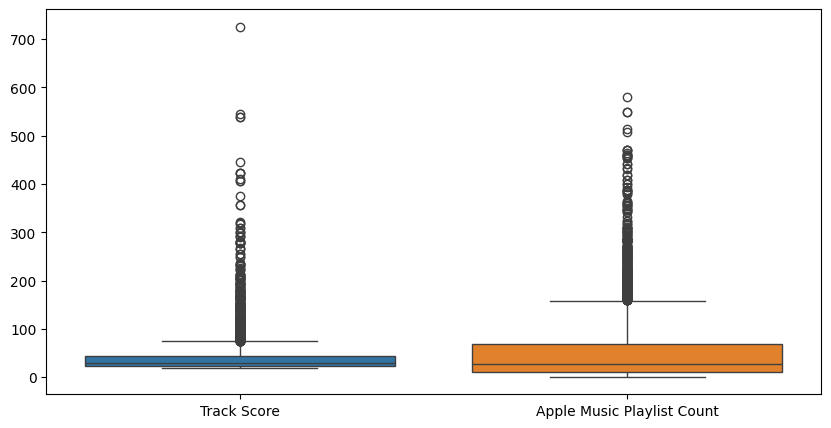

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_spy[num])
plt.show()

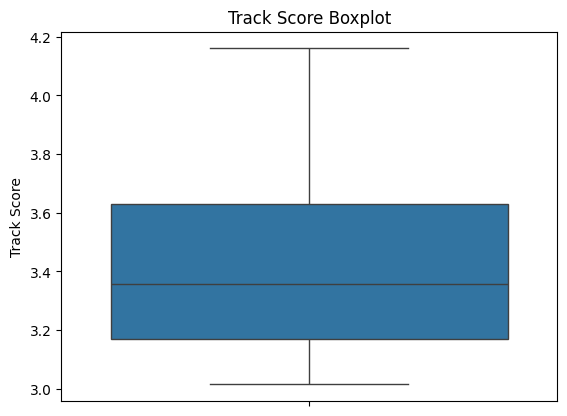

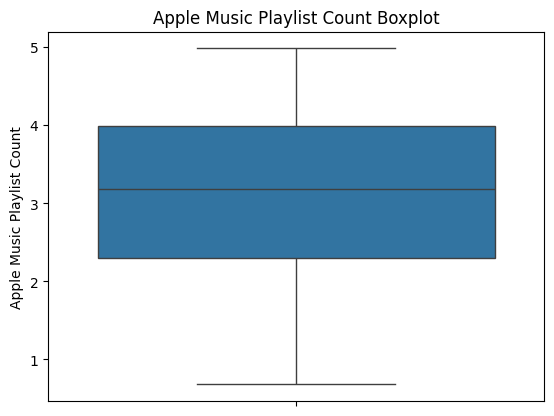

In [14]:
def remove_outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.0 * IQR
  lower_bound = Q1 - 1.0 * IQR
  data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data

columns_to_clean = ['Track Score', 'Apple Music Playlist Count']
df_spy = remove_outliers(df_spy, columns_to_clean)

df_spy['Track Score'] = np.log(df_spy['Track Score'] + 1)
df_spy['Apple Music Playlist Count'] = np.log(df_spy['Apple Music Playlist Count'] + 1)

sns.boxplot(data=df_spy['Track Score'])
plt.title('Track Score Boxplot')
plt.show()

sns.boxplot(data=df_spy['Apple Music Playlist Count'])
plt.title('Apple Music Playlist Count Boxplot')
plt.show()

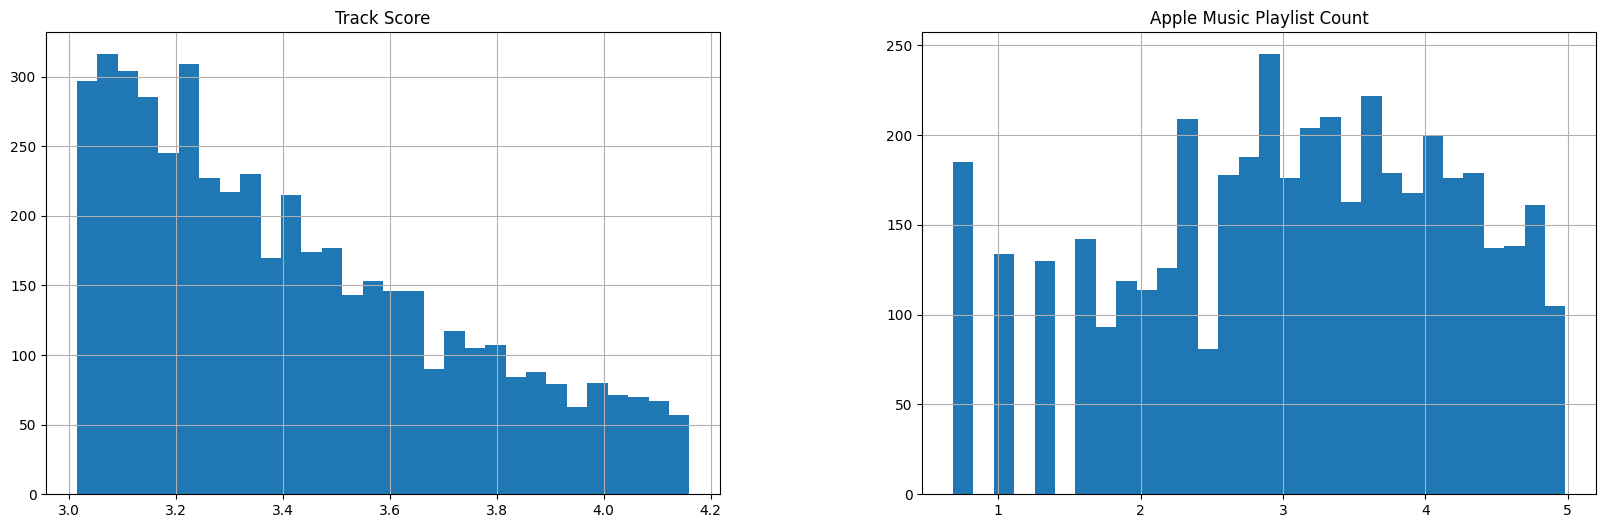

In [18]:
df_spy[num].hist(bins=30, figsize=(20,6))
plt.show()